Calculates fuel to mod vol

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import re
import glob
import seaborn as sns

In [10]:
D_fuel = .41*2 
t_gap = .01
t_clad = .06
Pi = math.pi
length = 400

A_fuel = ((D_fuel**2)*Pi)/4
Vol_fuel = A_fuel*length

A_core = ((D_fuel+(2*t_gap)+(2*t_clad))**2*Pi)/4

In [11]:
pitch = [1.10, 1.26, 1.40, 1.60, 1.80, 2.00]

In [12]:
ratio_list = []
for l in pitch:
    Vol_mod = (l**2 - A_core)*length
    print(Vol_mod)
    ratio = Vol_mod/Vol_fuel
    #print(ratio)
    ratio_list.append(ratio)
ratio_list

194.47082104516477
345.51082104516473
494.4708210451646
734.4708210451648
1006.4708210451648
1310.4708210451647


[0.9206125061415041,
 1.6356262659451886,
 2.340793437954966,
 3.4769381834057373,
 4.76456889491661,
 6.203685572487585]

In [16]:
k_list =[]

path = 'outputs/*.txt'
files = sorted(glob.glob(path))

for name in files:
    outputs = open(name, "r")
    val = 0
    print(name)
    
    for line in outputs:
        if re.match("(.*)final result(.*)", line):
            val = line
            val_s = val.split()
            #print(val_s)
            #print(val_s[2])
        if val != 0:
            break
    k_list.append(val_s[2])
k_list    
      
        

outputs/110_output.txt
outputs/126_output.txt
outputs/140_output.txt
outputs/160_output.txt
outputs/180_output.txt
outputs/200_output.txt


['1.29212', '1.43059', '1.48872', '1.52732', '1.53000', '1.51539']

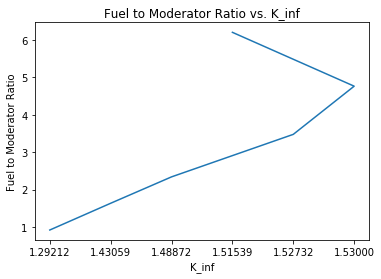

In [15]:
blue = plt.plot(k_list, ratio_list)
sns.set()
plt.title('Fuel to Moderator Ratio vs. K_inf')
plt.xlabel('K_inf')
plt.ylabel('Fuel to Moderator Ratio')

plt.savefig('FuelMod.jpg')
plt.show()

## Plotting for Problem 3

In [ ]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 110, 0.5)


def power(t, Λ):
    β = 2
    ρ = 1
    E = math.e
    
    y = E**(-((β-ρ)/Λ)*t)
    return y


# red dashes, blue squares and green triangles
plt.plot(t, power(t, 1), 'b', label = 'Λ = 1')
plt.plot(t, power(t, 5), 'orange', label = 'Λ = 5')
plt.plot(t, power(t, 10), 'r--', label = 'Λ = 10')
plt.plot(t, power(t, 20), 'purple', label = 'Λ = 20')
plt.xlabel('Time [s]')
plt.ylabel('Second Term Value')
plt.title('Λ Independence from Power Calculation')
plt.legend(loc='upper right')
plt.show()

In [ ]:
plt.plot?